In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [2]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [3]:
#First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.to_datetime(bb100['WeekID'])

In [4]:
#Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')

In [5]:
#Billboard Top #1 By Week from 1958 to 2021
bb1 = bb100[bb100['Week Position']==1].copy()
bb1.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
944,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,NaN,1,1
22342,http://www.billboard.com/charts/hot-100/1958-08-09,1958-08-09,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,1.0,1,2
232960,https://www.billboard.com/charts/hot-100/2021-05-22,2021-05-22,1,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),Leave The Door OpenSilk Sonic (Bruno Mars & Anderson .Paak),1,2.0,1,10
3522,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,1,Good 4 U,Olivia Rodrigo,Good 4 UOlivia Rodrigo,1,NaN,1,1


In [6]:
#Billboard Remaining #99 By Week from 1958 to 2021
bb99 = bb100[bb100['Week Position']!=1].copy()
bb99.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
8543,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,58,Fool's Paradise,The Crickets,Fool's ParadiseThe Crickets,1,NaN,58,1
131373,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,25,What Am I Living For,Chuck Willis,What Am I Living ForChuck Willis,1,NaN,25,1
290099,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,68,Streets,Doja Cat,StreetsDoja Cat,1,58.0,16,19
100794,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,26,Beautiful Mistakes,Maroon 5 Featuring Megan Thee Stallion,Beautiful MistakesMaroon 5 Featuring Megan Thee Stallion,1,18.0,18,11


In [7]:
#Check:
len(bb99)

324616

In [8]:
#Remove those songs in bottom 99 that at some point were #1: 
bb99 = bb99[bb99['Peak Position']!=1].copy()
print(bb99['Peak Position'].min())
bb99.sort_values(by='Peak Position').iloc[np.r_[0:2, -2:0]]

2


,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
82475,https://www.billboard.com/charts/hot-100/2021-02-27,2021-02-27,13,Therefore I Am,Billie Eilish,Therefore I AmBillie Eilish,1,15.0,2,15
104780,http://www.billboard.com/charts/hot-100/2005-07-16,2005-07-16,5,Inside Your Heaven,Bo Bice,Inside Your HeavenBo Bice,1,2.0,2,2
104311,http://www.billboard.com/charts/hot-100/1961-02-18,1961-02-18,100,Dream Boy,Annette With The Afterbeats,Dream BoyAnnette With The Afterbeats,1,NaN,100,1
22000,http://www.billboard.com/charts/hot-100/1964-06-20,1964-06-20,100,Steal Away,Jimmy Hughes,Steal AwayJimmy Hughes,1,NaN,100,1


In [9]:
#Check:
len(bb99)

311409

In [10]:
bb1_features = pd.merge(bb1, features, on='SongID', how='left')
keep = ['danceability', 'energy', 'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 'valence', 'tempo']
bb1_features[keep].mean()

danceability          0.646389
energy                0.606016
speechiness           0.072325
acousticness          0.279380
instrumentalness      0.028337
liveness              0.170337
valence               0.614919
tempo               118.113831
dtype: float64

In [11]:
bb99_features = pd.merge(bb99, features, on='SongID', how='left')
keep = ['danceability', 'energy', 'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 'valence', 'tempo']
bb99_features[keep].mean()

danceability          0.611545
energy                0.631634
speechiness           0.071513
acousticness          0.260643
instrumentalness      0.028311
liveness              0.186207
valence               0.599366
tempo               120.130304
dtype: float64

In [12]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'Group': ['1s','99s'],
'Danceability': [0.646, 0.611],
'Energy': [0.606, 0.631],
'Speechiness': [0.0723, 0.071],
'Acousticness': [0.279, 0.260],
'Instrumentalness': [0.028, 0.028],
'Liveness': [0.170, 0.186],
'Valence':[0.614, 0.599],
})

In [13]:
df

,Group,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Liveness,Valence
0,1s,0.646,0.606,0.0723,0.279,0.028,0.170,0.614
1,99s,0.611,0.631,0.0710,0.260,0.028,0.186,0.599


(0.0, 40.0)

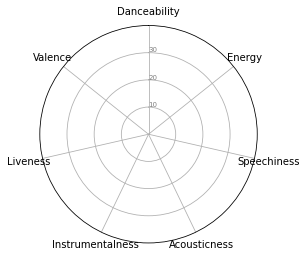

In [14]:
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)

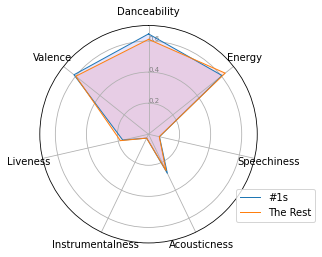

In [15]:
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6], ["0.2","0.4","0.6"], color="grey", size=7)
plt.ylim(0,0.7)

# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('Group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="#1s")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('Group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="The Rest")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='lower left', bbox_to_anchor=(0.88, 0.075))

# Show the graph
plt.show()

In [16]:
#Getting Data From The 60's, 70's, 80's, 90's, 00's, 10's
bb60s = bb100[(bb100['WeekID'] >= '1960-1-1') & (bb100['WeekID'] < '1970-1-1')]
bb70s = bb100[(bb100['WeekID'] >= '1970-1-1') & (bb100['WeekID'] < '1980-1-1')]
bb80s = bb100[(bb100['WeekID'] >= '1980-1-1') & (bb100['WeekID'] < '1990-1-1')]
bb90s = bb100[(bb100['WeekID'] >= '1990-1-1') & (bb100['WeekID'] < '2000-1-1')]
bb2000s = bb100[(bb100['WeekID'] >= '2000-1-1') & (bb100['WeekID'] < '2010-1-1')]
bb2010s = bb100[(bb100['WeekID'] >= '2010-1-1') & (bb100['WeekID'] < '2020-1-1')]
bb2020s = bb100[(bb100['WeekID'] >= '2020-1-1') & (bb100['WeekID'] < '2022-1-1')]

In [17]:
bb60s_features = pd.merge(bb60s, features, on='SongID', how='left')
keep = ['danceability', 'energy', 'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 'valence', 'tempo']
bb60s_features[keep].mean()

danceability          0.534563
energy                0.515995
speechiness           0.049199
acousticness          0.524225
instrumentalness      0.056394
liveness              0.215586
valence               0.667754
tempo               119.687649
dtype: float64

In [18]:
bb70s_features = pd.merge(bb70s, features, on='SongID', how='left')
keep = ['danceability', 'energy', 'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 'valence', 'tempo']
bb70s_features[keep].mean()

danceability          0.578622
energy                0.581086
speechiness           0.052244
acousticness          0.336621
instrumentalness      0.046150
liveness              0.188122
valence               0.665430
tempo               119.353487
dtype: float64

In [19]:
bb80s_features = pd.merge(bb80s, features, on='SongID', how='left')
keep = ['danceability', 'energy', 'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 'valence', 'tempo']
bb80s_features[keep].mean()

danceability          0.629781
energy                0.649123
speechiness           0.046358
acousticness          0.208785
instrumentalness      0.026678
liveness              0.177853
valence               0.655414
tempo               121.080617
dtype: float64

In [20]:
bb90s_features = pd.merge(bb90s, features, on='SongID', how='left')
keep = ['danceability', 'energy', 'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 'valence', 'tempo']
bb90s_features[keep].mean()

danceability          0.650911
energy                0.646782
speechiness           0.074395
acousticness          0.176666
instrumentalness      0.029460
liveness              0.177769
valence               0.576200
tempo               117.513200
dtype: float64

In [21]:
bb2000s_features = pd.merge(bb2000s, features, on='SongID', how='left')
keep = ['danceability', 'energy', 'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 'valence', 'tempo']
bb2000s_features[keep].mean()

danceability          0.632925
energy                0.709780
speechiness           0.097080
acousticness          0.148563
instrumentalness      0.007860
liveness              0.179232
valence               0.556140
tempo               120.086203
dtype: float64

In [22]:
bb2010s_features = pd.merge(bb2010s, features, on='SongID', how='left')
keep = ['danceability', 'energy', 'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 'valence', 'tempo']
bb2010s_features[keep].mean()

danceability          0.647745
energy                0.679556
speechiness           0.100735
acousticness          0.162962
instrumentalness      0.007084
liveness              0.176312
valence               0.502580
tempo               122.386642
dtype: float64

In [23]:
bb2020s_features = pd.merge(bb2020s, features, on='SongID', how='left')
keep = ['danceability', 'energy', 'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 'valence', 'tempo']
bb2020s_features[keep].mean()

danceability          0.661142
energy                0.619501
speechiness           0.107855
acousticness          0.248985
instrumentalness      0.003990
liveness              0.171407
valence               0.500475
tempo               120.884929
dtype: float64

In [24]:
# Set data
df = pd.DataFrame({
'Group': ['60s','70s','80s','90s','00s','10s', '20s'],
'Danceability': [0.534, 0.578, 0.629, 0.651, 0.633, 0.647, 0.661],
'Energy': [0.515, 0.581, 0.649, 0.646, 0.710, 0.679, 0.619],
'Speechiness': [0.049, 0.052, 0.046, 0.074, 0.097, 0.100, 0.107],
'Acousticness': [0.524, 0.336, 0.208, 0.176, 0.149, 0.162, 0.248],
'Instrumentalness': [0.056, 0.046, 0.026, 0.029, 0.008, 0.007, 0.004],
'Liveness': [0.215, 0.188, 0.177, 0.177, 0.179, 0.176, 0.171],
'Valence':[0.667, 0.665, 0.655, 0.576, 0.556, 0.502, 0.500],
})

In [25]:
df

,Group,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Liveness,Valence
0,60s,0.534,0.515,0.049,0.524,0.056,0.215,0.667
1,70s,0.578,0.581,0.052,0.336,0.046,0.188,0.665
2,80s,0.629,0.649,0.046,0.208,0.026,0.177,0.655
3,90s,0.651,0.646,0.074,0.176,0.029,0.177,0.576
4,00s,0.633,0.710,0.097,0.149,0.008,0.179,0.556
5,10s,0.647,0.679,0.100,0.162,0.007,0.176,0.502
6,20s,0.661,0.619,0.107,0.248,0.004,0.171,0.500


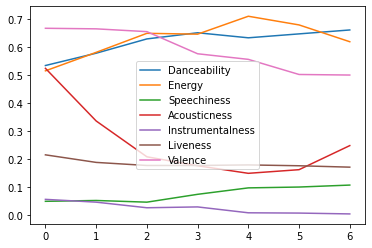

In [26]:
df.plot();

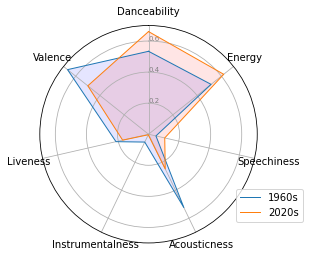

In [27]:
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6], ["0.2","0.4","0.6"], color="grey", size=7)
plt.ylim(0,0.7)

# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('Group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="1960s")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[6].drop('Group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="2020s")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='lower left', bbox_to_anchor=(0.88, 0.075))

# Show the graph
plt.show()